<a href="https://colab.research.google.com/github/Meemansha-spec/Complete-Python-3-Bootcamp/blob/master/01_tensorflow_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Regression with Neural Network

* we predict a continuos variable

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


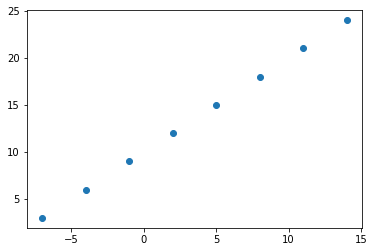

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

plt.scatter(x,y);

In [ ]:
y == x+10 ## this is the relationship between x and y

array([ True,  True,  True,  True,  True,  True,  True,  True])

## we need to predict the relationship between a xnd y

In [ ]:
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = x.shape
out_shape = y.shape


In [ ]:
input_shape , out_shape

((8,), (8,))

In [ ]:
x[0] , y[0]  ##--> each element in the array predicts y . x[0] should predict y[0]

(-7.0, 3.0)

In [ ]:
x[0].ndim

0

In [ ]:
x.ndim

1

#### Turn out numpy arrays into tensors

In [ ]:
x = tf.constant(x)
y = tf.constant(y)
x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
x[0].shape

TensorShape([])

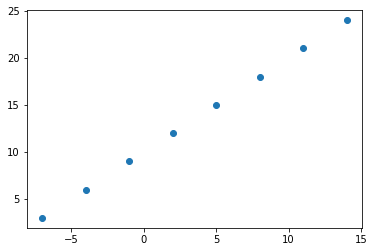

In [ ]:
plt.scatter(x,y)

## steps in modelling with tensorflow

**creating a model**

**compiling the model**

**fitting the model**   




In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
mae_accuracy = 3.9525

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae') <= mae_accuracy):
      print("\nReached %2.2f%% accuracy, so stopping training!!" %(mae_accuracy*100))   
      self.model.stop_training = True

In [ ]:
callbacks = myCallback()

In [ ]:

tf.random.set_seed(42)

## creating a model
model = tf.keras.Sequential([
        #tf.keras.layers.Dense(100,activation = 'relu'),
        tf.keras.layers.Dense(1)])

In [ ]:
## compiling the model
model.compile(loss='mae' ,optimizer =  tf.keras.optimizers.SGD(lr=0.01),metrics = ["mae"])

In [ ]:
model.fit(x,y,epochs = 50,callbacks=[callbacks])

Epoch 1/50
1/1 [==============================] - 0s 234ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/50
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/50
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/50
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/50
1/1 [==============================] - 0s 5ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/50
1/1 [==============================] - 0s 5ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/50
1/1 [==============================] - 0s 6ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/50
1/1 [==============================] - 0s 6ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/50
1/1 [==============================] - 0s 4ms/step - lo

In [ ]:
x ,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
model.predict([17.0])

array([[29.783512]], dtype=float32)

## Visualize

In [ ]:
X = tf.range(-100 ,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

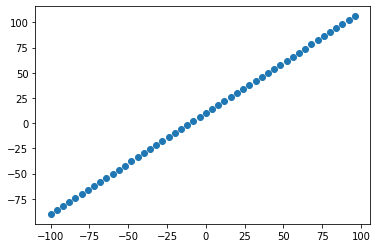

In [ ]:
plt.scatter(X,y)



*   Training
*   Testing
*    Valiadation set





In [ ]:
len(X)

50

In [ ]:
## Split the data ito train and test sets
X_train = X[:40] 
X_test = X[40:] ## last 10

y_train =  y[:40]
y_test = y[40:]

len(X_train) , len(X_test) 

(40, 10)

## visualize the data

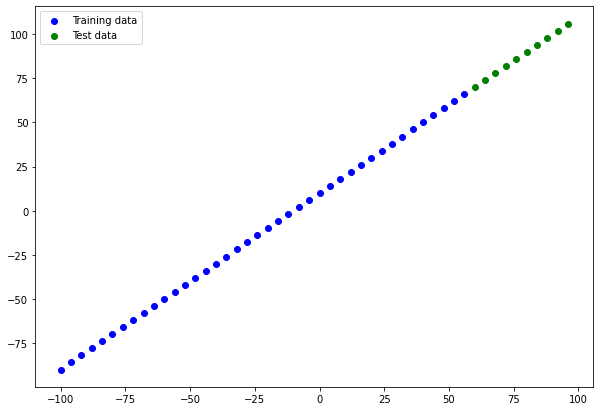

In [ ]:
plt.figure(figsize = (10,7)) 
plt.scatter(X_train , y_train , c = "b" , label = "Training data")
plt.scatter(X_test , y_test , c = "g" , label = "Test data")

plt.legend()

## Figure out the relationship between x and y by visualizing

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, input_shape = [1],name = "input_layer"),
        tf.keras.layers.Dense(1,name = "output_layer")
        ] , name = "model_1")

model.compile(loss = 'mae' , optimizer= "sgd" , metrics = ['mae'])
model.build()

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train , y_train , epochs = 100,verbose = 0)

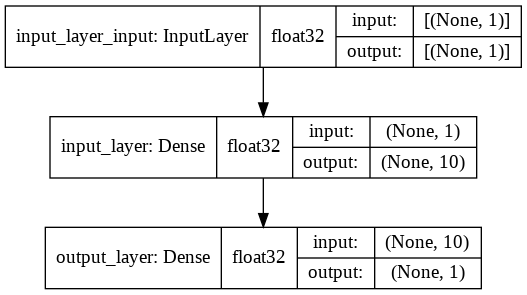

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model,show_shapes = True , show_dtype = True )

### Visualizing out model predictions

In [ ]:
y_preds = model.predict(X_test) 
y_preds

array([[ 70.48065 ],
       [ 75.06518 ],
       [ 79.64971 ],
       [ 84.23423 ],
       [ 88.81876 ],
       [ 93.40328 ],
       [ 97.98781 ],
       [102.572334],
       [107.15686 ],
       [111.74139 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
def plot_predictions(train_data = X_train , train_label = y_train,test_data = X_test,
                     test_label = y_test,predictions = y_preds):
  """
  plot the data

  """
  plt.figure(figsize = (10,7))
  plt.scatter(train_data , train_label , c = 'b' , label = "Training data")
  plt.scatter(test_data , test_label , c = "g" , label = "Testing data")
  plt.scatter(test_data , predictions, c = 'r' , label = "Predictions")
  plt.legend()

  
  

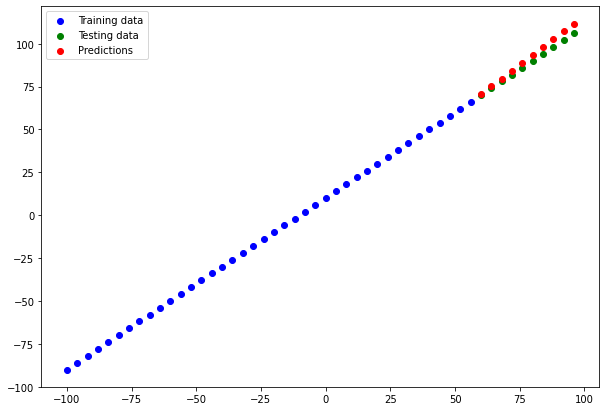

In [ ]:
plot_predictions(train_data = X_train , train_label = y_train,test_data = X_test,
                     test_label = y_test,predictions = y_preds)

## evaluate the model

In [ ]:
model.evaluate(X_test , y_test)

1/1 [==============================] - 0s 80ms/step - loss: 3.1110 - mae: 3.1110


[3.111020565032959, 3.111020565032959]

In [ ]:
## calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test  , y_pred = y_preds)

In [ ]:
y_test.dtype

tf.int32

In [ ]:
y_pred = tf.constant(y_preds)

In [ ]:
y_pred.dtype

tf.float32

In [ ]:
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.615479 , 14.160893 , 11.740115 , 10.353154 , 10.       ,
       10.680656 , 12.3951235, 15.257868 , 19.15686  , 23.741386 ],
      dtype=float32)>

In [ ]:
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.48065 ],
       [ 75.06518 ],
       [ 79.64971 ],
       [ 84.23423 ],
       [ 88.81876 ],
       [ 93.40328 ],
       [ 97.98781 ],
       [102.572334],
       [107.15686 ],
       [111.74139 ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

### Make `y_pred` and `y_test` in same shape

In [ ]:
y_squeeze = tf.squeeze(y_pred)
y_true = y_test

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true , y_squeeze )

In [ ]:
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1110206>

## make functions to reuse 

In [ ]:
def mae(y_true , y_pred):
  return tf.metrics.mean_absolute_error(y_true  , y_pred )

In [ ]:
def mse(y_true , y_pred):
  return tf.losses.mean_squared_error(y_true  , y_pred )

In [ ]:
X_train,y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

##model_1

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])

model_1.compile(loss = 'mae' , optimizer= "sgd" , metrics = ['mae'])

In [ ]:
model_1.fit(X_train , y_train , epochs = 10)

Epoch 1/10
2/2 [==============================] - 0s 6ms/step - loss: 16.4124 - mae: 16.4124
Epoch 2/10
2/2 [==============================] - 0s 7ms/step - loss: 11.0829 - mae: 11.0829
Epoch 3/10
2/2 [==============================] - 0s 5ms/step - loss: 11.1242 - mae: 11.1242
Epoch 4/10
2/2 [==============================] - 0s 9ms/step - loss: 8.6945 - mae: 8.6945
Epoch 5/10
2/2 [==============================] - 0s 5ms/step - loss: 9.8003 - mae: 9.8003
Epoch 6/10
2/2 [==============================] - 0s 4ms/step - loss: 9.5263 - mae: 9.5263
Epoch 7/10
2/2 [==============================] - 0s 4ms/step - loss: 8.4102 - mae: 8.4102
Epoch 8/10
2/2 [==============================] - 0s 7ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/10
2/2 [==============================] - 0s 4ms/step - loss: 19.4932 - mae: 19.4932
Epoch 10/10
2/2 [==============================] - 0s 5ms/step - loss: 9.6061 - mae: 9.6061


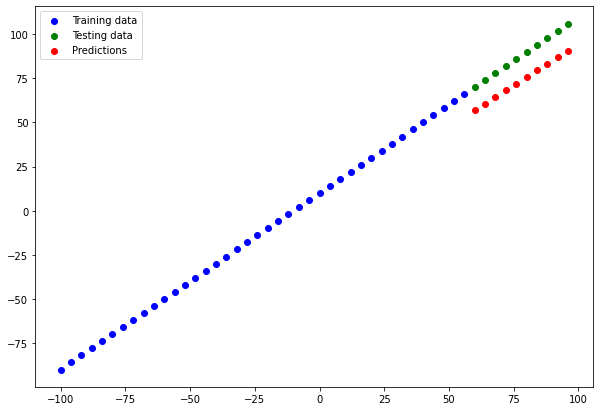

In [ ]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [ ]:
mae_1 = mae(y_test , tf.squeeze(y_preds_1))
mse_1 = mse(y_test,tf.squeeze(y_preds_1))
mae_1 , mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.248449>,
 <tf.Tensor: shape=(), dtype=float32, numpy=203.43506>)

In [ ]:
y_preds_1

array([[56.762974],
       [60.53821 ],
       [64.31345 ],
       [68.08869 ],
       [71.86393 ],
       [75.63917 ],
       [79.41441 ],
       [83.18965 ],
       [86.96489 ],
       [90.74013 ]], dtype=float32)

In [ ]:
y_preds

array([[ 70.48065 ],
       [ 75.06518 ],
       [ 79.64971 ],
       [ 84.23423 ],
       [ 88.81876 ],
       [ 93.40328 ],
       [ 97.98781 ],
       [102.572334],
       [107.15686 ],
       [111.74139 ]], dtype=float32)

## model 2

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1)
])

model_2.compile(loss = 'mae' , optimizer= "sgd" , metrics = ['mse'])
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1)
])

model_2.compile(loss = 'mae' , optimizer= "sgd" , metrics = ['mse'])

In [ ]:
model_2.fit(X_train , y_train , epochs = 100,verbose = 0)

In [ ]:
y_preds_2 = model_2.predict(X_test)

In [ ]:
plot_predictions(predictions=y_preds_2)

In [ ]:
model_2.evaluate(y_test , y_preds_2)

In [ ]:
mae_2 = mae(y_test , tf.squeeze(y_preds_2))
mse_2 = mse(y_test , tf.squeeze(y_preds_2))
mae_2 , mse_2

## model 3

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1)
])

model_3.compile(loss = 'mae' , optimizer= "sgd" , metrics = ['mse'])

In [ ]:
model_3.fit(X_train , y_train , epochs = 500,verbose = 0)

In [ ]:
y_pred_3 = model_3.predict(X_test)

In [ ]:
plot_predictions(predictions=y_pred_3)

In [ ]:
mae_3 = mae(y_test , tf.squeeze(y_pred_3))
mse_3 = mse(y_test , tf.squeeze(y_pred_3))
mae_3 , mse_3

## put it in the neat and clean manner

In [ ]:
model_results = [["model_1", mae_1.numpy(),mse_1.numpy()],
                 
                 ["model_2",mae_2.numpy(),mse_2.numpy()],
                 ["model_3",mae_3.numpy(),mse_3.numpy()]]

                 
        

In [ ]:
import pandas as pd
all_results = pd.DataFrame(model_results , columns = ["model","mae","mse"])
all_results

### model_1 performed the best

## Save the models
Two formats
* savemodel format
* HDF5 format

In [ ]:
model_1.save("best_model_SavedModel_format")

In [ ]:
model_1.save("best_model_HDF5_format.h5")

## How to load a saved model

In [ ]:
loaded_savedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_savedModel_format.summary()

In [ ]:
model_1.summary()

In [ ]:
## compare model 2 predictions with saved model
model_1_preds = model_1.predict(X_test)
loaded_savedModel_format_preds = loaded_savedModel_format.predict(X_test)
model_1_preds == loaded_savedModel_format_preds

In [ ]:
mae(y_true = y_test , y_pred= model_1_preds) == mae(y_true=y_test , y_pred = loaded_savedModel_format_preds)

In [ ]:
model_1_preds.squeeze()

In [ ]:
loaded_savedModel_format_preds.squeeze()

In [ ]:
## load using h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")

## Download files from colab

In [ ]:
#from google.colab import files
#files.download('/content/best_model_HDF5_format.h5')

In [ ]:
#!cp /content/best_model_HDF5_format.h5

## Putting together what we have learnt

In [ ]:
import pandas as pd


In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.dtypes

### Perform one-hot encoding

In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X = insurance_one_hot.drop("charges" ,axis = 1)
y = insurance_one_hot["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
X.dtypes

age                   int64
bmi                 float64
children              int64
sex_female            uint8
sex_male              uint8
smoker_no             uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2 ,random_state = 42 )

In [ ]:
len(X) , len(X_train) , len(X_test)

In [ ]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
tf.keras.layers.Dense(10,activation = 'relu'),
tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mae , optimizer = tf.keras.optimizers.Adam() , metrics = ['mae'])

In [ ]:
history = insurance_model.fit(X_train, y_train,epochs = 200,verbose = 0)

In [ ]:
y_test

In [ ]:
insurance_model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
insurance_pred = insurance_model.predict(X_test)

In [ ]:
#insurance_pred

In [ ]:
insurance_model.evaluate(X_test , y_test)

## Plot

Text(0.5, 0, 'epochs')

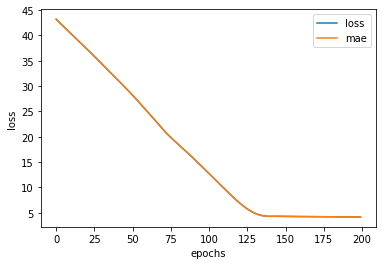

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Further improve the model by scaling(normalisation or standardization)

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(),["age" , "bmi","children"]),
    (OneHotEncoder(handle_unknown =  "ignore"),["sex","smoker","region"])
)
    

In [ ]:
X = insurance.drop("charges" , axis = 1)
y = insurance["charges"]

In [ ]:
X1_train , X1_test , y1_train , y1_test = train_test_split(X,y, test_size = 0.2 ,random_state = 42 )

In [ ]:
ct.fit(X1_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('minmaxscaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['sex', 'smoker', 'region'])],
                  verbose=False)

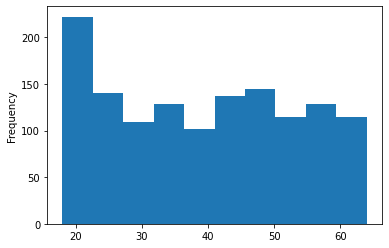

In [ ]:
X["age"].plot(kind = "hist")

In [ ]:
X_train_normal = ct.transform(X1_train)
X_test_normal = ct.transform(X1_test)

In [ ]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
X1_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X1_train.shape , X_train_normal.shape , X1_train.dtypes

((1070, 6), (1070, 11), age           int64
 sex          object
 bmi         float64
 children      int64
 smoker       object
 region       object
 dtype: object, dtype('float64'))

In [ ]:
y1_train.dtypes

dtype('float64')

## build insurance_model2

In [ ]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
tf.keras.layers.Dense(100,activation = 'relu'),
tf.keras.layers.Dense(10,activation = 'relu'),
tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss = tf.keras.losses.mae , optimizer = tf.keras.optimizers.Adam() , metrics = ['mae'])

In [ ]:
history_1 = insurance_model_2.fit(X_train_normal, y1_train,epochs = 200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 4940.0493 - mae: 4940.0493
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 4858.7339 - mae: 4858.7339
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 4774.9102 - mae: 4774.9102
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 4694.8516 - mae: 4694.8516
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 4614.7290 - mae: 4614.7290
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 4536.2505 - mae: 4536.2505
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 4460.7939 - mae: 4460.7939
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 4390.1040 - mae: 4390.1040
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 4320.7549 - mae: 4320.7549
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 4255.4331 - mae: 4255.4331

In [ ]:
insurance_model_2.evaluate(X_test_normal,y1_test)

9/9 [==============================] - 0s 2ms/step - loss: 2901.4431 - mae: 2901.4431


[2901.443115234375, 2901.443115234375]

In [ ]:
insurance_model_2.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_36 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 11        
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 0, 'epochs')

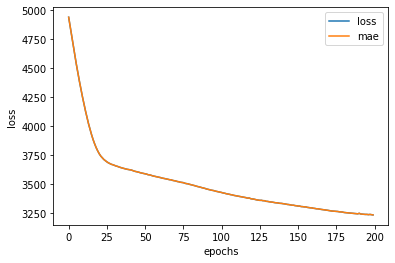

In [ ]:
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")